## Explicación del objetivo.
#### El objetivo del siguiene trabajo es generar un modelo de clasificación que pueda predecir si un cliente va a abandonar el banco del que provienen los datos o si seguirá siendo un cliente. 
#### Para lograr este objetivo:
 1. Se debe determinar que variables son las que explican nuestro target que en este caso son las personas que dejan el banco.
 2. Debemos buscar correlaciones entre las variables.
 3. Limpiar la base de datos.

## Definición de la fuente de los datos. 
#### El presente dataset fue extraído de Kaggle (https://www.kaggle.com/shrutimechlearn/churn-modelling).
#### El dataset está compuesto por 1000 entradas y las siguientes columnas:
   - RowNumber: Número de fila, del 0 al 1000
   - CustomerId: Un número único de identificación para cada cliente
   - Surname:  El apellido de cada cliente
   - CreditScore: Un número del 300 al 800, que determina qué tan probable es que el cliente pueda devolver un préstamo. 
   - Geography: El país al que pertenece cliente.
   - Gender: El género del cliente. 
   - Age: Edad del client
   - Tenure: Cuántos años lleva siendo cliente del banco.
   - Balance: El balance de su cuenta bancaria
   - NumOfProducts: La cantidad de productos del banco que el cliente tiene activos
   - HasCrCard: Si el cliente cuenta con tarjeta de crédito o no
   - IsActiveMember: Indicador binario de si el cliente era un miembro activo del banco al momento de que se generó el registro de abandono ('Exited').
   - Exited: Indicador binario de si el cliente abandonó la institución o no (0: no abandonó, 1: abandonó)

### El equipo de trabajo está conformado por Ana María Castillo y Santiago Plana.


## 1. Análisis exploratorio, visualización y arreglo de los datos (Data Wrangling y EDA)

- Revisar datos faltantes
- Dropear las columnas que no nos van a servir para el modelado
- Implementar visualización para análisis uni, bi y multivariado.
- Flagear variables categóricas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['text.color'] = 'r'
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")

In [9]:
df0 = pd.read_csv('Churn_Modelling1.csv')
df= df0.copy()

In [10]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9854,9855,15752650,Saad,681,Spain,Female,37,6,"121,231.39",1,1,1,"146,366.08",0
6089,6090,15711316,Ch'ang,771,France,Male,27,2,0.00,2,1,1,"199,527.34",0
6075,6076,15781451,Buccho,504,France,Male,42,3,"134,936.97",2,0,0,"135,178.91",0
711,712,15650288,Summers,634,Germany,Male,35,6,"116,269.01",1,1,0,"129,964.94",0
7343,7344,15763194,Milanesi,643,France,Male,34,7,0.00,2,0,1,"100,304.13",0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00","5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"


1. El 75% de los clientes tienen un score crediticio de 718.
2. El 50% de los clientes tienen un balance de 97,198.54 con un producto en el banco el cual puede ser una tarjeta de crédito.
3. El salario estimado del 75% de los clientes es de 149,388.
4. Menos del 25% de los clientes han dejado del banco.
5. El promedio de edad de las personas en el banco es de 38 años con un promedio de tenure de 5 años.

In [8]:
df.CustomerId.duplicated().sum()   ## chequeamos si hay entradas duplicadas. 

0

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
drop_columns = ["RowNumber", "CustomerId", "Surname"]

df.drop(drop_columns, axis = 1, inplace = True)

### Dejamos las columnas que nos van a servir para el análisis. 'RowNumber', 'CustomerID' y 'Surname' no aportan nada al modelado ni al análisis.

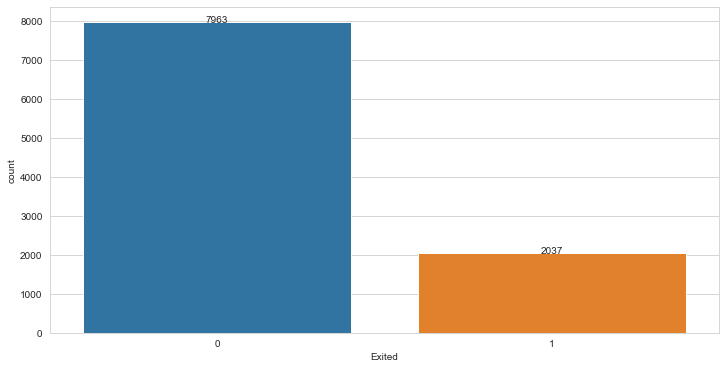

In [9]:
## Lo primero es visualizar el outcome

sns.countplot(x = df["Exited"], data = df)
for index,value in enumerate(df["Exited"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", fontsize = 10)

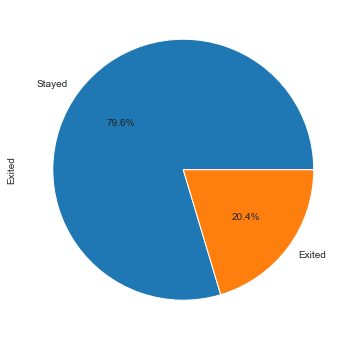

In [7]:
v_counts = df.Exited.value_counts()
labels = ['Stayed', 'Exited']
v_counts.plot(kind='pie', labels=labels, autopct= '%1.1f%%')
plt.show()

#### 2037 clientes dejaron el banco (20,37%) 
#### 7963 clientes no dejaron el banco (79,63%)
#### El promedio de edad de los clientes que se fueron es un poco mayor que el de quienes no se fueron.
#### El balance de quienes se fueron es apenas mayor también, pero puede tener que ver con la edad porque no ocurre lo mismo con el salario.

In [13]:
df[df['Exited']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,"7,963.00",651.85,95.65,405.00,585.00,653.00,718.00,850.00
Age,"7,963.00",37.41,10.13,18.00,31.00,36.00,41.00,92.00
Tenure,"7,963.00",5.03,2.88,0.00,3.00,5.00,7.00,10.00
Balance,"7,963.00","72,745.30","62,848.04",0.00,0.00,"92,072.68","126,410.28","221,532.80"
NumOfProducts,"7,963.00",1.54,0.51,1.00,1.00,2.00,2.00,3.00
HasCrCard,"7,963.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"7,963.00",0.55,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"7,963.00","99,738.39","57,405.59",90.07,"50,783.49","99,645.04","148,609.96","199,992.48"
Exited,"7,963.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
df[df['Exited']==1].describe().T  

,count,mean,std,min,25%,50%,75%,max
CreditScore,"2,037.00",645.35,100.32,350.00,578.00,646.00,716.00,850.00
Age,"2,037.00",44.84,9.76,18.00,38.00,45.00,51.00,84.00
Tenure,"2,037.00",4.93,2.94,0.00,2.00,5.00,8.00,10.00
Balance,"2,037.00","91,108.54","58,360.79",0.00,"38,340.02","109,349.29","131,433.33","250,898.09"
NumOfProducts,"2,037.00",1.48,0.80,1.00,1.00,1.00,2.00,4.00
HasCrCard,"2,037.00",0.70,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"2,037.00",0.36,0.48,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,"2,037.00","101,465.68","57,912.42",11.58,"51,907.72","102,460.84","152,422.91","199,808.10"
Exited,"2,037.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00


1. Tanto el promedio y la media de edad de los clientes que se fueron es bastante más alta en relación a los clientes que se quedaron. 
2. El balance también es bastante mayor en quienes se fueron. No así el salario estimado. 
3. El promedio de clientes activos es más bajo entre quienes abandonaron el banco. Se puede concluir que fue el período en que el descontento, -o las razones para abandonar el banco-, se tradujo en la decisión efectiva de irse. 
4. El score crediticio, la cantidad de años con el banco, el número de productos y la tenencia o no de tarjeta de crédito parecen no tener grandes diferencias de un grupo a otro. 

In [7]:
## Separamos variables discretas de continuas
continuous = df.drop(['Exited', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'], axis=1)
discrete = df.drop(['CreditScore', 'Balance', 'EstimatedSalary'], axis=1)

In [11]:
discrete.head(5)

,RowNumber,CustomerId,Surname,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,Hargrave,France,Female,42,2,1,1,1,1
1,2,15647311,Hill,Spain,Female,41,1,1,0,1,0
2,3,15619304,Onio,France,Female,42,8,3,1,0,1
3,4,15701354,Boni,France,Female,39,1,2,0,0,0
4,5,15737888,Mitchell,Spain,Female,43,2,1,1,1,0


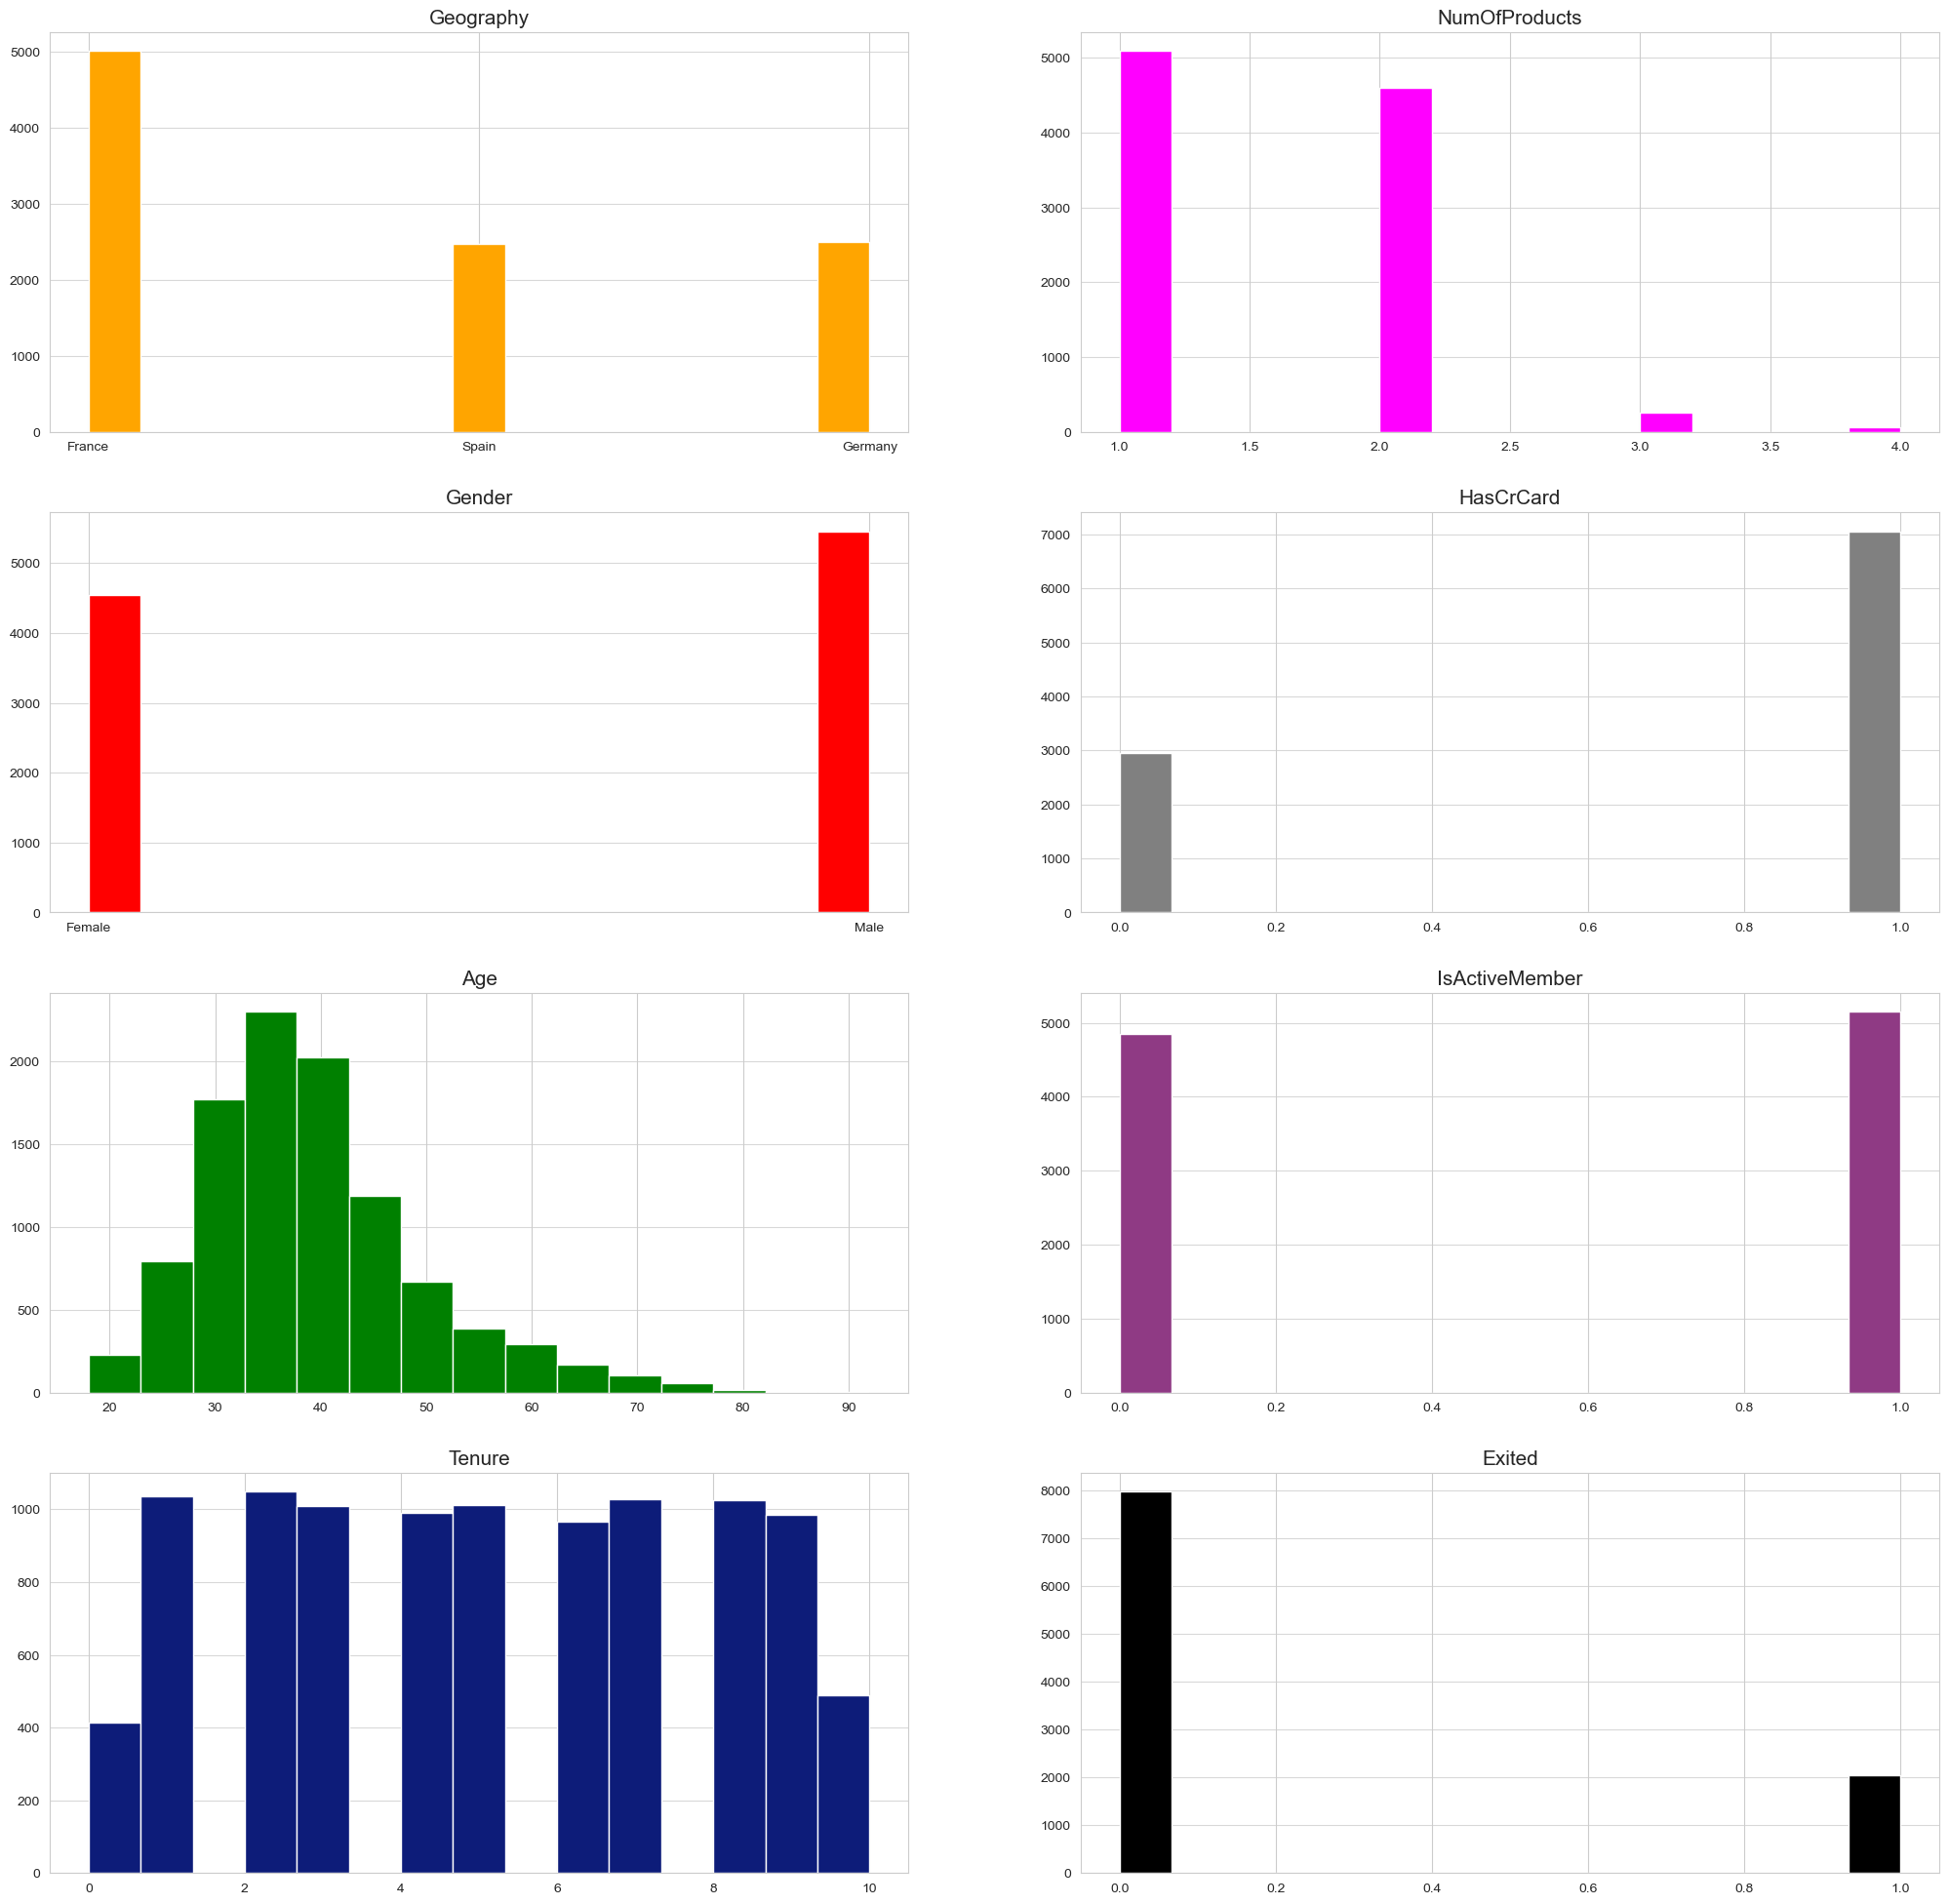

In [5]:
columns = discrete.columns

enum = enumerate(columns)

fig,ax= plt.subplots(nrows=round(len(columns)/2), ncols = 2, dpi=100, figsize = (25, 25))

colors = ['orange', 'red', 'green', '#0D1C79', 'magenta', 'gray', '#8F3A84', 'black', 'maroon', '#295664']

bin_count = int(np.ceil(np.log2(len(df))) + 1)

count = 0
for index, col in enum:
   # bin_count = int(np.ceil(np.log2(len(col))) + 1)
    if index <=3:
        ax[index][0].hist(df[col], color=colors[index], bins=bin_count)
        ax[index][0].set_title(columns[index], fontsize=15)
        ax[index][0].grid(axis='y', alpha=0.75)
    else:
        ax[count][1].hist(df[col], color=colors[index], bins=bin_count)
        ax[count][1].set_title(columns[index], fontsize=15)
        ax[count][1].grid(axis='y', alpha=0.75)
        count += 1
    

Los anterior nos muestra la siguiente información:
1. La mayoría de los clientes tienen 1 o 2 productos financieros.
2. Los clientes son en su mayoría de Francia.
3. El 70,55% de los clientes tienen tarjeta de crédito.
4. El grueso de los clientes esta entre 30 y 40 años.


In [18]:
bin_count = int(np.ceil(np.log2(len(df.Age))) + 1)
bin_count

15

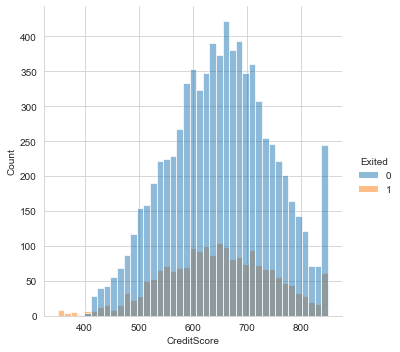

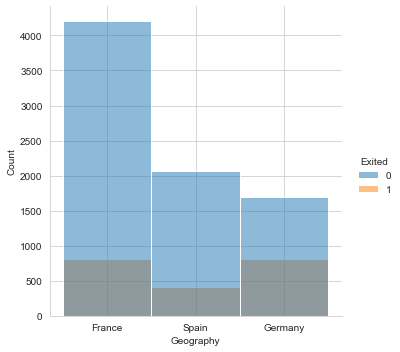

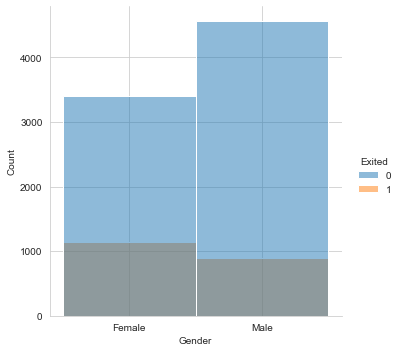

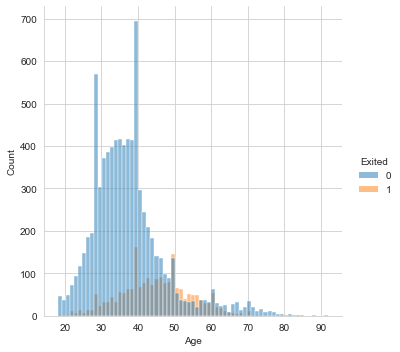

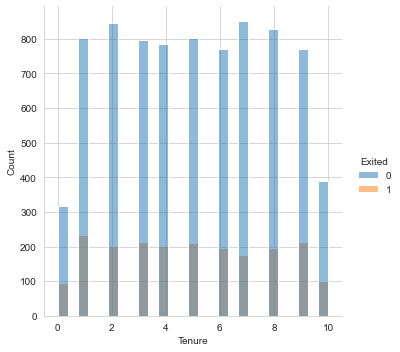

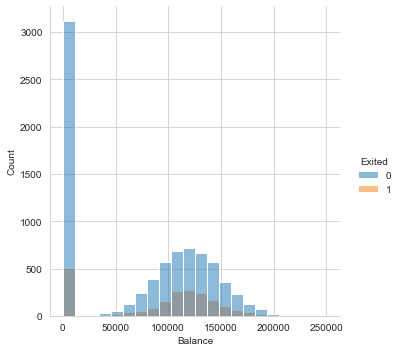

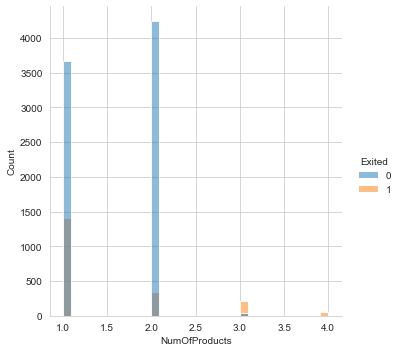

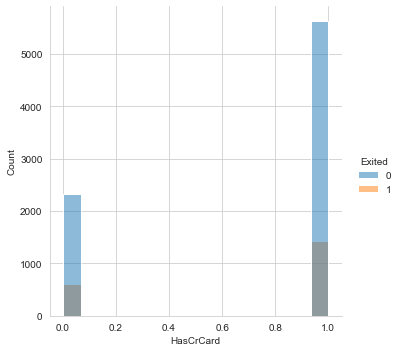

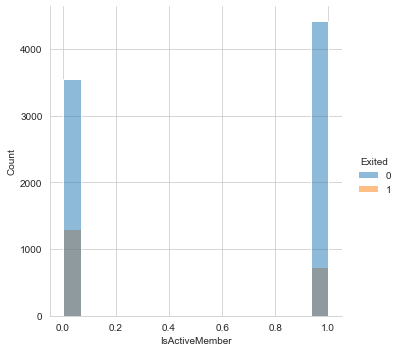

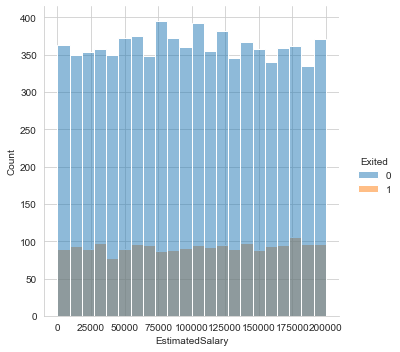

In [6]:
columns = df.columns
for col in columns:
    if col not in columns[-1]:
        sns.displot(df, x=col, hue='Exited')
    else:
        break

1. Parece haber una distribución pareja a lo largo del rango de salarios estimados.
2. La mayoría de las personas que han salido del banco tienen entre 40 y 60 años y además tienen un score crediticio en promedio de 645.
3. El score crediticio esta entre 560 y 740.

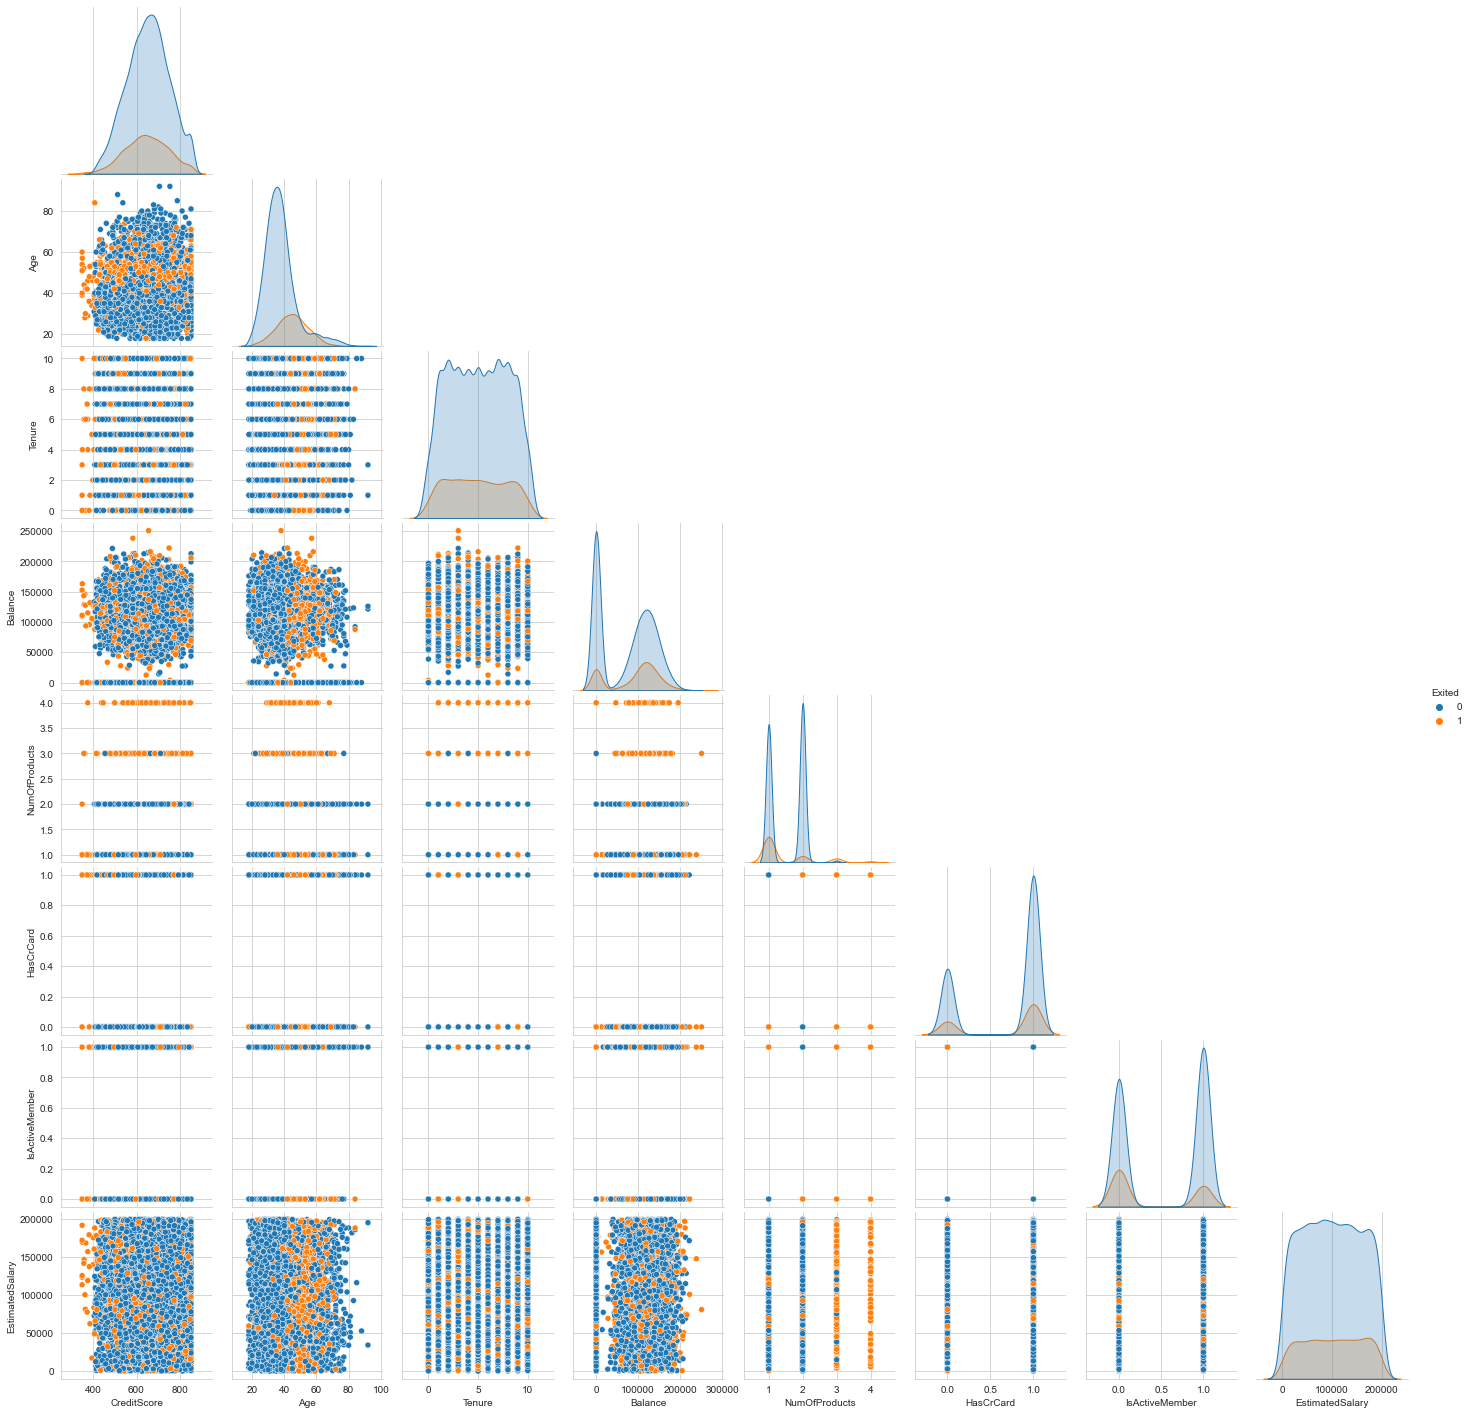

In [55]:
sns.pairplot(df, hue="Exited", corner=True)
plt.show()

<AxesSubplot:>

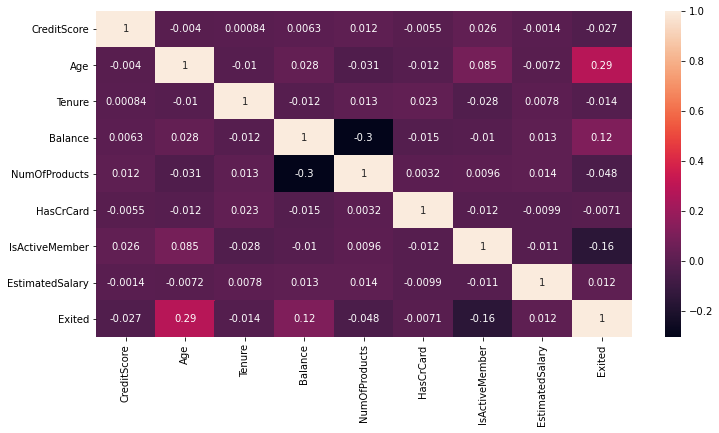

In [21]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

1. Se confirma que el balance, el score crediticio y el tenure no son factores determinantes para la salida de los clientes del banco puesto que no se encuentra una fuerte correlación.
2. Por otro lado, la edad parece ser el factor más relacionado con las deserciones, seguida del balance.
3. El tenure no tiene relación alguna con la edad ni el score crediticio..
4. El número de productos no es un factor determinante para la salida del banco, al igual que el hecho de saber si el cliente tiene o no una tarjeta de crédito.
5. El salario estimado parece estar correlacionado en mayor proporción con el score crediticio, la edad y el balance.
6. La mayoría de las personas que han dejado el banco eran miembros inactivos.
7. Podemos decir que el target muestra cierta correlación positiva con las variables 'Age', 'Balance' y 'Estimated Salary', siendo la edad la más importante.
8. El aumento en productos afecta negativamente la decisión de continuar en el banco.

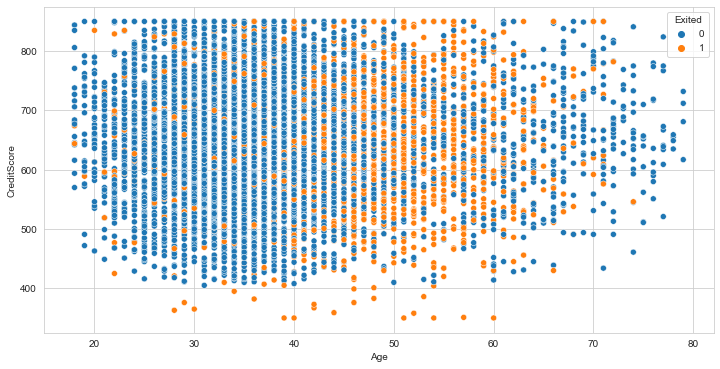

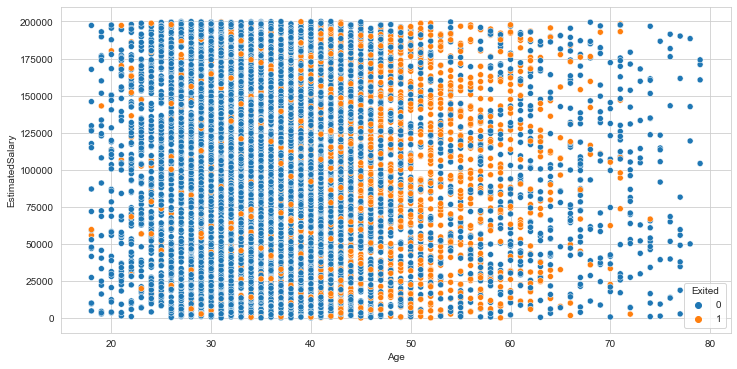

In [192]:
## Distribución del salario estimado y el Score Crediticio según la edad separando según el target(si dejaron el banco o no)
sns.scatterplot(x=df['Age'], y=df['CreditScore'], hue=df['Exited'])
plt.savefig('Cscore-age scatterplot.png')
plt.show()


sns.scatterplot(x=df["Age"], y=df["EstimatedSalary"],hue = df.Exited)
plt.savefig('Esalary-age scatterplot2.png')
plt.show()


#### La totalidad de los clientes con un Credit Score por debajo de 400 dejaron el banco.  
#### Seguimos observando que la franja etaria de 40-60 años condensa la mayoría de los clientes que dejaron el banco.

In [8]:
cScore = (df[df['CreditScore'] <=400].Exited.value_counts(normalize=True) * 100)
print(f'El {cScore[1]}% de los clientes con un Credit Score menor a 400 dejó el banco')

El 100.0% de los clientes con un Credit Score menor a 400 dejó el banco


In [368]:
by_age = df[df['Age'] >= 40].Exited.value_counts()
mean = round((by_age[1] / 2037) * 100)
mean2 = round((by_age[1] / by_age.sum()) * 100)
print(f'El {mean}% de los clientes que se fueron tienen más de 40 años')
print(f'Representa un {mean2}% del total de clientes de más de 40 años')

El 71% de los clientes que se fueron tienen más de 40 años
Representa un 36% del total de clientes de más de 40 años


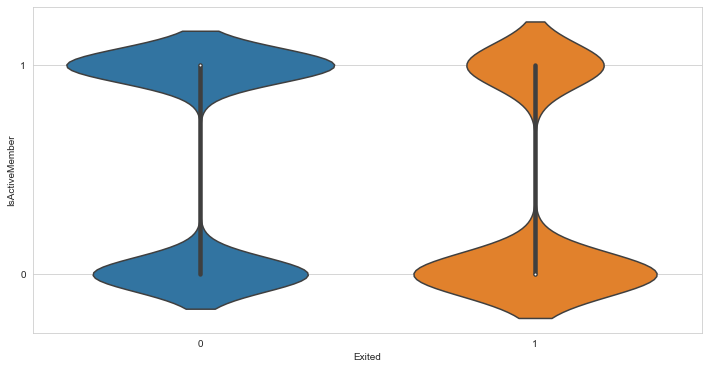

In [57]:
sns.violinplot(data=df, x='Exited', y='IsActiveMember')
plt.yticks(ticks=[0,1])
plt.show()


In [54]:
inactive = round(df[df['Exited'] == 1].IsActiveMember.value_counts(normalize=True) * 100)

print(f'El {inactive[0]}% de los clientes que abandonaron el banco eran miembros inactivos.')

El 64.0% de los clientes que abandonaron el banco eran miembros inactivos.


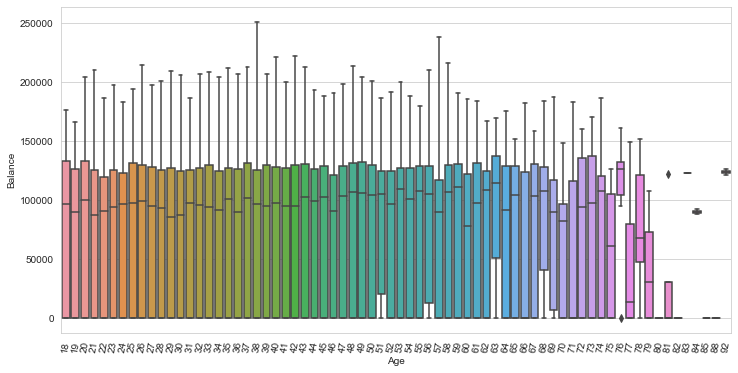

In [9]:
sns.boxplot(data=df, x='Age', y='Balance')
plt.xticks(rotation=80)
plt.show()

In [10]:
## Eliminamos los outliers que vemos en el gráfico y las últimas edades para las cuales no hay suficientes datos. 

print(df[(df['Age'] == 76) & (df['Balance'] == 0)].index)
df[(df['Age'] == 81) & (df['Balance'] > 100000)].index

Int64Index([3142], dtype='int64')


Int64Index([4931], dtype='int64')

In [11]:
indexes = [3142, 4931]
df.drop(indexes, axis=0, inplace=True)

In [12]:
df = df[df['Age'] < 80]
print(df0.shape)
df.shape

(10000, 14)


(9984, 11)

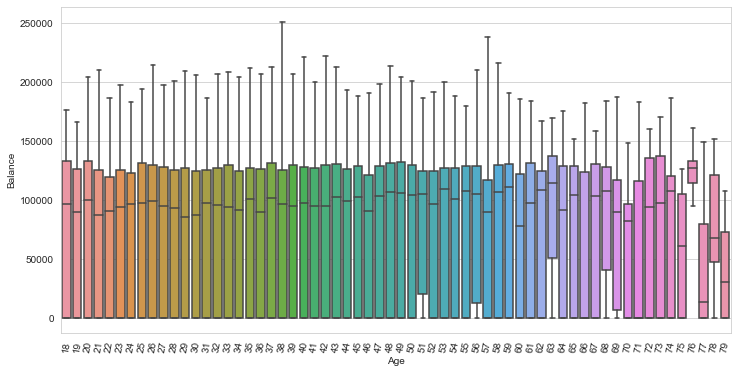

In [13]:
sns.boxplot(data=df, x='Age', y='Balance')
plt.xticks(rotation=80)
plt.show() 

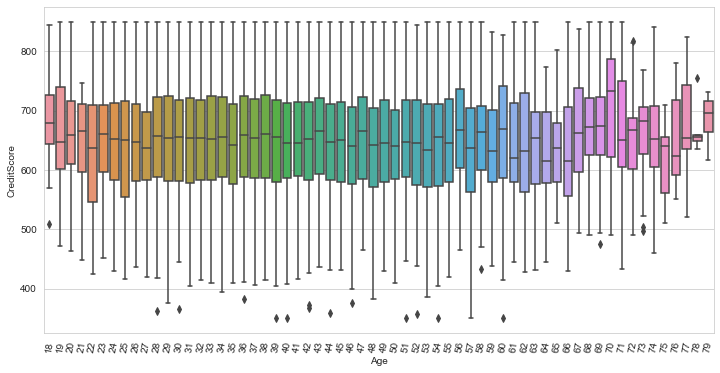

In [14]:
sns.boxplot(data=df, x='Age', y='CreditScore')
plt.xticks(rotation=80)
plt.show() 

### Como vimos en uno de los scatterplots, la totalidad de los clientes con un score creiditicio por debajo de los 400 dejó el banco. Probablemente por la imposibilidad de conseguir préstamos.
### Nos parece que a pesar de constituir un porcentaje muy pequeño de los datos, su tendencia tan absoluta hace que quizás sean datos que es mejor no soslayar. No así los demás outliers.

In [15]:
df.reset_index(inplace=True)

In [16]:
## Eliminamos los outliers que vemos en el gráfico. 

print(df[(df['Age'] == 18) & (df['CreditScore'] < 550)].index)
print(df[(df['Age'] == 58) & (df['CreditScore'] < 450)].index)
print(df[(df['Age'] == 69) & (df['CreditScore'] < 490)].index)
print(df[(df['Age'] == 73) & (df['CreditScore'] < 520)].index)
#print(df[(df['Age'] == 72) & (df['CreditScore'] > 800)].index)
print(df[(df['Age'] == 78) & (df['CreditScore'] > 700)].index)

Int64Index([9766], dtype='int64')
Int64Index([1156], dtype='int64')
Int64Index([1979], dtype='int64')
Int64Index([2898, 3695], dtype='int64')
Int64Index([9318], dtype='int64')


In [17]:
indexes = [9766, 1156, 1979, 2898, 3695, 9318]
df.drop(indexes, axis=0, inplace=True)

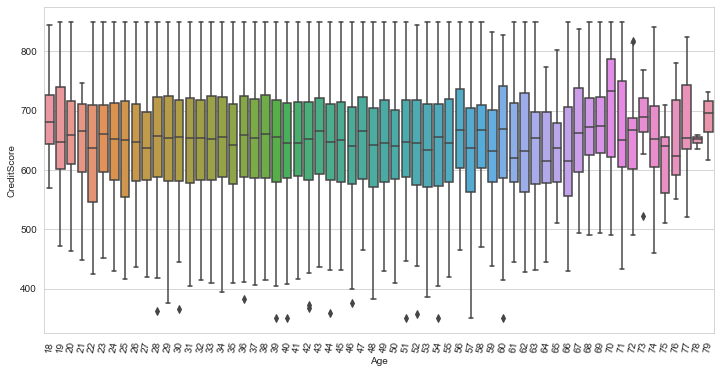

In [18]:
sns.boxplot(data=df, x='Age', y='CreditScore')
plt.xticks(rotation=80)
plt.show() 

In [19]:
print(df[(df['Age'] == 73) & (df['CreditScore'] < 550)].index)

Int64Index([1408], dtype='int64')


In [20]:
df.reset_index(inplace=True)

In [21]:
df.drop(1407, axis=0, inplace=True)

In [22]:
df.shape

(9977, 13)

In [23]:
df.drop(['level_0', 'index'], axis=1, inplace=True)

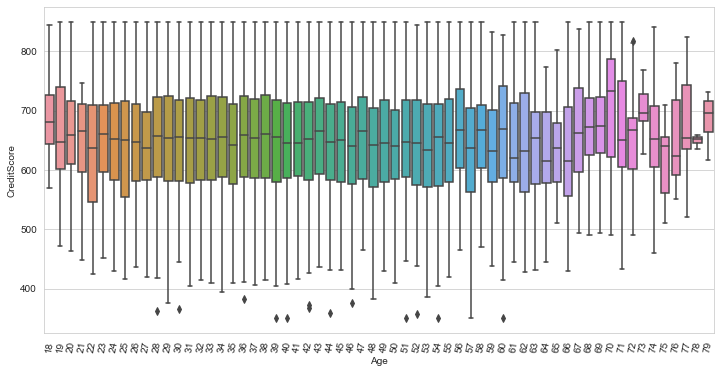

In [24]:
sns.boxplot(data=df, x='Age', y='CreditScore')
plt.xticks(rotation=80)
plt.show() 

### Hay una diferencia mínima entre el último outlier y el valor más próximo. 

### Ahora flageamos dummies

In [25]:
df = pd.get_dummies(df)

In [26]:
df.to_csv('Churn Modelling x.csv', index=True)

In [11]:
df = pd.read_csv('Churn Modelling x.csv')

In [12]:
df.shape

(9977, 15)

In [13]:
df1 = df.copy()

### Modelos

#### Como mencionamos previamente, el problema presente es un problema de clasificación: el objetivo es poder armar un modelo a partir de los datos disponibles que pueda clasificar los clientes más propensos a abandonar el banco para luego poder tomar decisiones que prevengan o minimicen la pérdida de clientes. Para eso seleccionamos tres modelos que se ajustan al problema:
- Random Forest Classifier: El principio clave de este algoritmo es la construcción de muchos árboles de decisión, que "votan" (moda) en la fase de clasificación. Este sistema de "votación" corrige en parte la tendencia de los árboles de decisión de caer en overfitting. Los hiperparámetros que nos parece relevante optimizar para la mejora del modelo son la profunidad máxima (max_depth), que limita la expansión de los nodos; el número máximo de características (variables independientes) a tener en cuenta en cada separación (max_features); el criterio (criterion, Gini index o entropy) de división de los subconjuntos de características para dividir los nodos; y el peso de clase (class weight), utilizado para revertir el desbalanceo de clases (clase 0: se queda, clase 1: se van) a la hora del análisis. Esto es un paso más para prevenir el overfitting de la clase mayoritaria.    
- Regresión Logística (Logistic Regression): La regresión logísitica es un algoritmo que sirve exclusivamente para clasificar los datapoints en dos clases, o binariamente. Exactamente lo que nosotros necesitamos. En cuanto a los hiperparámetros que vamos a introducir para probar en la validación, los más relevantes para este clasificador son la penalización/regularización (l1, l2) que sirven para impedir el overfitting penalizando los valores extremos de las variables independientes; número de iteraciones máximas (max_iter); el parámetro C, que a bajo nivel le otorga más importancia a la penalización sobre los parámetros extremos (la regularización que mencionamos antes), y a nivel alto le otorga más importancia a los datos de entrenamiento; nuevamente el peso de clase, para compensar el desbalanceo de clases; intercept scaling, que es recomendado desde la documentación de scikit-learn si usamos 'liblinear' como solver (que lo usamos, ya que es lo recomendado para datasets pequeños como el nuestro, y que además acepta ambos tipos de regularización).
- SVM (Support Vector Machines): Estos modelos son ampliamente usados para problemas de clasificación aunque no exclusivamente. El objetivo es generar lineas (hiperarplanos) que dividan iterativamente el conjunto de datos en clases de la mejor manera hasta encontrar la división correcta. Nosotros usaremos C-Support Vector Classification, que es un tipo de SVM. Los hiperparámetros que nos parece relevante explorar son: el Kernel, que hipersimplificadamente podríamos decir que es la forma de la línea (hiperplano) que el modelo va a usar para clasificar los datos. Vamos a probar kernel linear, rbf y; C, que es el valor de regularización mencionado en el punto de Regresión Logística (la penalización es l2); 

#### Todos los clasificadores van a ser implementados a través de GridSearchCV o RandomizedSearchCV para validar y encontrar los mejores valores de cada hiperparámetro previamente detallado. Además toda la optimización va a ser orientada a conseguir un buen 'recall'. Entendemos que es la métrica adecuada para este problema, ya que es más importante identificar un mayor número de clientes propensos a irse para poder implementar las estrategias de negocio, publicidad y/o marketing pertinentes, incluso cuando dentro de nuestras clasificaciones se encuentren erróneamente clasificados clientes que no sean propensos a abandonar la institución. Es probable que cualquier estrategia abordada para mantener clientes no sea inútil o contraproducente, o suponga gastos mucho mayores, incluso cuando esté también dirigida a una porción de clientes que no pertenezcan a la clase para la que está específicamente diseñada.                               

In [317]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, accuracy_score, f1_score

In [336]:
list_of_rows = []     ## para hacer Dataframe con las métricas

### Random Forest Classifier (Grid Search CV)

In [255]:
X = df.drop('Exited', axis=1)
y  = df['Exited']

In [256]:
X_train, X_test,y_train, y_test = train_test_split(X, y, stratify=y,
                                                   test_size=0.2, random_state=42)

In [257]:
params = {'max_depth': [4, 6, 8], 'max_features': [3, 6, 8, 10, 13], 'random_state': [42], 
          'class_weight': ['balanced', 'balanced_subsample'], 'criterion': ['entropy','gini']}

In [258]:
rfc = RandomForestClassifier()

clf = GridSearchCV(rfc, params, scoring='recall')

In [259]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 6, 8],
                         'max_features': [3, 6, 8, 10, 13],
                         'random_state': [42]},
             scoring='recall')

In [261]:
clf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 13,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [262]:
forest_predict = clf.predict(X_test)

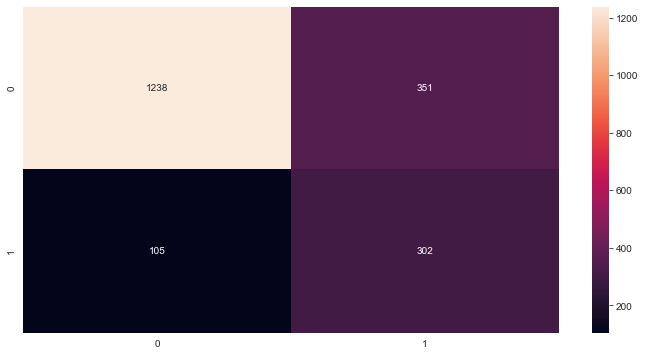

In [263]:
cnf = confusion_matrix(y_test, forest_predict)
sns.heatmap(cnf, annot=True, fmt='d')
plt.show()

In [264]:
print(classification_report(y_test, forest_predict))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1589
           1       0.46      0.74      0.57       407

    accuracy                           0.77      1996
   macro avg       0.69      0.76      0.71      1996
weighted avg       0.83      0.77      0.79      1996



In [337]:
f_pred_proba = clf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, f_pred_proba)
auc_rf

0.700229464546645

In [338]:
s1 = pd.Series({'Model': 'Random Forest Classifier',
               'Cross Validation': 'Grid Search',
               'ROC Score': auc_rf,
               'Recall': recall_score(y_test, forest_predict),
               'Accuracy': accuracy_score(y_test, forest_predict),
               'F1': f1_score(y_test, forest_predict)})


list_of_rows.append(s1)

## Random Forest con RandomizedSearchCV

In [267]:
randomized_f = RandomizedSearchCV(estimator=rfc, param_distributions=params, scoring='recall')

In [268]:
randomized_f.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 6, 8],
                                        'max_features': [3, 6, 8, 10, 13],
                                        'random_state': [42]},
                   scoring='recall')

In [269]:
randomized_f.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [270]:
r_forest_predict = randomized_f.predict(X_test)

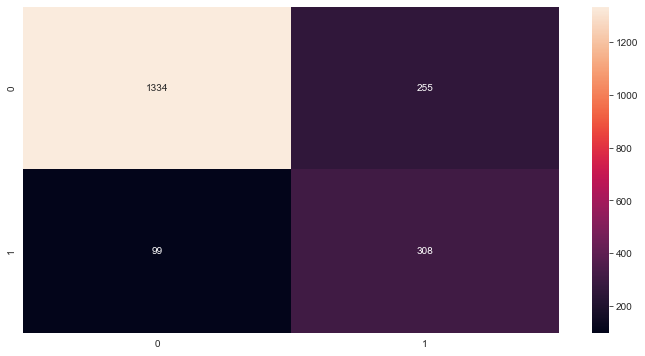

In [271]:
cnf = confusion_matrix(y_test, r_forest_predict)
sns.heatmap(cnf, annot=True, fmt='d')
plt.show()

In [331]:
print(classification_report(y_test, r_forest_predict))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1589
           1       0.55      0.76      0.64       407

    accuracy                           0.82      1996
   macro avg       0.74      0.80      0.76      1996
weighted avg       0.85      0.82      0.83      1996



In [361]:
f_pred_proba2 = randomized_f.predict_proba(X_test)[:, 1]
auc_rf1 = roc_auc_score(y_test, f_pred_proba2)
auc_rf1

0.46229761427999316

In [362]:
s2 = pd.Series({'Model': 'Random Forest Classifier',
               'Cross Validation': 'Randomized Search',
               'ROC Score': auc_rf1,
               'Recall': recall_score(y_test, r_forest_predict),
               'Accuracy': accuracy_score(y_test, r_forest_predict),
               'F1': f1_score(y_test, r_forest_predict)})

list_of_rows.append(s2)

### Logistic Regression

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [276]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [277]:
penalty = ['l1', 'l2']
dual=[False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
class_weight = ['balanced', None]
intercept_scaling=[1,1.2,1.4,1.6,1.8]
param_grid = dict(dual=dual,max_iter=max_iter,C=C, penalty=penalty, class_weight=class_weight,
                 intercept_scaling=intercept_scaling)

In [278]:
lgr = LogisticRegression(solver='liblinear', random_state=42)
random = RandomizedSearchCV(estimator=lgr, param_distributions=param_grid, scoring='recall')

In [279]:
X_train.shape

(7981, 14)

In [280]:
random_lgr = random.fit(X_train, y_train)

In [281]:
random_lgr.best_estimator_.get_params()

{'C': 2.5,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.6,
 'l1_ratio': None,
 'max_iter': 120,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [282]:
r_lr_predict = random_lgr.predict(X_test)

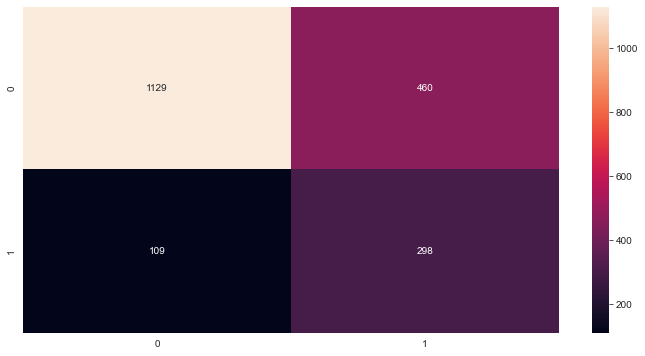

In [283]:
cnf = confusion_matrix(y_test, r_lr_predict)
sns.heatmap(cnf, annot=True, fmt='d')
plt.show()

In [284]:
print(classification_report(y_test, r_lr_predict))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1589
           1       0.39      0.73      0.51       407

    accuracy                           0.71      1996
   macro avg       0.65      0.72      0.66      1996
weighted avg       0.81      0.71      0.74      1996



In [341]:
lr_pred_proba = random_lgr.predict_proba(X_test)[:,1]             # Usamos probabilidad de predicción para el puntaje AUC/ROC
auc_lr = roc_auc_score(y_test, lr_pred_proba)
auc_lr

0.7957672759434874

In [342]:
s3 = pd.Series({'Model': 'logistic Regression',
               'Cross Validation': 'Randomized Search',
               'ROC Score': auc_lr,
               'Recall': recall_score(y_test, r_lr_predict),
               'Accuracy': accuracy_score(y_test, r_lr_predict),
               'F1': f1_score(y_test, r_lr_predict)})

list_of_rows.append(s3)

## Regresión Lineal con GridSearch

In [287]:
grid_lineal = GridSearchCV(lgr, param_grid, scoring='recall')

In [288]:
result = grid_lineal.fit(X_train, y_train)

In [289]:
result.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [290]:
lr_predict = result.predict(X_test)

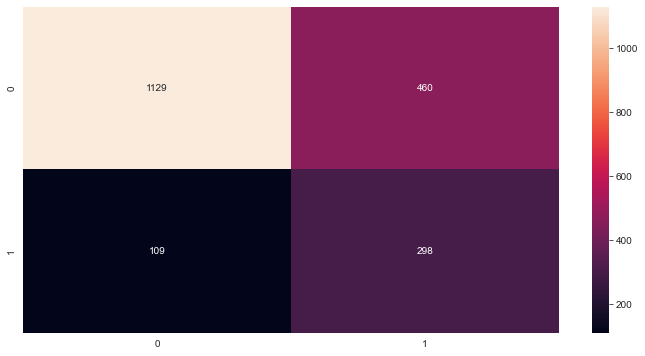

In [291]:
cnf = confusion_matrix(y_test, lr_predict)
sns.heatmap(cnf, annot=True, fmt='d')
plt.show()

In [292]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1589
           1       0.39      0.73      0.51       407

    accuracy                           0.71      1996
   macro avg       0.65      0.72      0.66      1996
weighted avg       0.81      0.71      0.74      1996



In [344]:
lr_pred_proba1 = result.predict_proba(X_test)[:,1]
auc_lr1 = roc_auc_score(y_test, lr_pred_proba1)
auc_lr1

0.8660485246388332

In [345]:
s4 = pd.Series({'Model': 'logistic Regression',
               'Cross Validation': 'Grid Search',
               'ROC Score': auc_lr1,
               'Recall': recall_score(y_test, lr_predict),
               'Accuracy': accuracy_score(y_test, lr_predict),
               'F1': f1_score(y_test, lr_predict)})

list_of_rows.append(s4)

### Support Vector Machines

In [295]:
from sklearn.svm import SVC

In [296]:
kernel = ['linear','rbf', 'poly']
C = [1.0,1.5,2.0,2.5]
class_weight = ['balanced', None]
params = dict(kernel=kernel, C=C, class_weight=class_weight)

In [297]:
svc = SVC(random_state=42, probability=True)
r_svc = RandomizedSearchCV(estimator=svc, param_distributions=params, scoring='recall')

In [298]:
r_svc = r_svc.fit(X_train, y_train)

In [299]:
r_svc.best_estimator_.get_params()

{'C': 2.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [300]:
svc_predict = r_svc.predict(X_test)


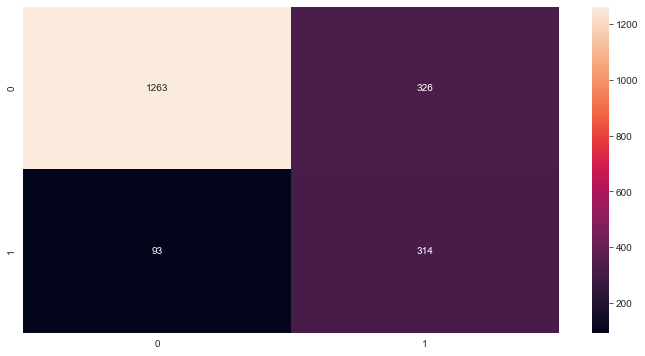

In [301]:
cnf = confusion_matrix(y_test, svc_predict)
sns.heatmap(cnf, annot=True, fmt='d')
plt.show()

In [302]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1589
           1       0.49      0.77      0.60       407

    accuracy                           0.79      1996
   macro avg       0.71      0.78      0.73      1996
weighted avg       0.84      0.79      0.81      1996



In [346]:
svm_pred_proba = r_svc.predict_proba(X_test)[:,1]
auc_svm = roc_auc_score(y_test, svm_pred_proba)
auc_svm

0.8660485246388332

In [347]:
s5 = pd.Series({'Model': 'SVM-SVC',
               'Cross Validation': 'Randomized Search',
               'ROC Score': auc_svm,
               'Recall': recall_score(y_test, svc_predict),
               'Accuracy': accuracy_score(y_test, svc_predict),
               'F1': f1_score(y_test, svc_predict)})

list_of_rows.append(s5)

## SVC con GridSearch

In [306]:
g_svc = GridSearchCV(svc, params, scoring='recall')

In [307]:
result = g_svc.fit(X_train, y_train)

In [308]:
result.best_estimator_.get_params()

{'C': 2.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [309]:
gsvc_predict = result.predict(X_test)

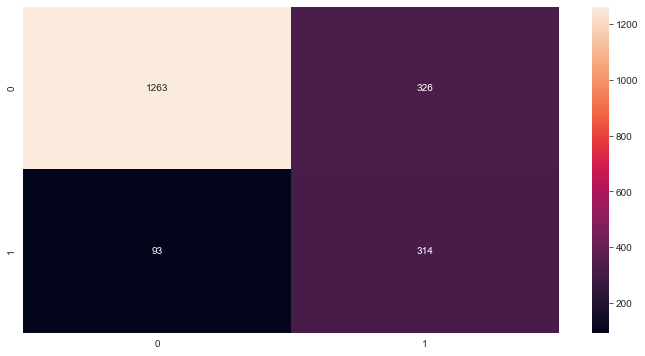

In [310]:
cnf = confusion_matrix(y_test, gsvc_predict)
sns.heatmap(cnf, annot=True, fmt='d')
plt.show()

In [311]:
print(classification_report(y_test, gsvc_predict))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1589
           1       0.49      0.77      0.60       407

    accuracy                           0.79      1996
   macro avg       0.71      0.78      0.73      1996
weighted avg       0.84      0.79      0.81      1996



In [348]:
svm_pred_proba1 = g_svc.predict_proba(X_test)[:,1]
auc_svm1 = roc_auc_score(y_test, svm_pred_proba1)
auc_svm1

0.8660485246388332

In [349]:
s6 = pd.Series({'Model': 'SVM-SVC',
               'Cross Validation': 'Grid Search',
               'ROC Score': auc_svm1,
               'Recall': recall_score(y_test, gsvc_predict),
               'Accuracy': accuracy_score(y_test, gsvc_predict),
               'F1': f1_score(y_test, gsvc_predict)})

list_of_rows.append(s6)

In [350]:
metrics_df = pd.DataFrame(list_of_rows)
metrics_df

,Model,Cross Validation,ROC Score,Recall,Accuracy,F1
0,Random Forest Classifier,Grid Search,0.70,0.74,0.77,0.57
1,Random Forest Classifier,Randomized Search,0.46,0.76,0.82,0.64
2,logistic Regression,Randomized Search,0.80,0.73,0.71,0.51
3,logistic Regression,Grid Search,0.87,0.73,0.71,0.51
4,SVM-SVC,Randomized Search,0.87,0.77,0.79,0.60
5,SVM-SVC,Grid Search,0.87,0.77,0.79,0.60


### Curva ROC

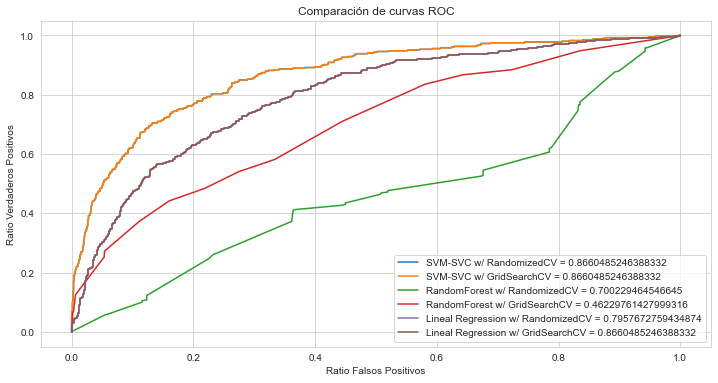

In [366]:

disp = plot_roc_curve(r_svc, X_test, y_test, label=f'SVM-SVC w/ RandomizedCV = {auc_svm1}')
plot_roc_curve(g_svc, X_test, y_test, ax=disp.ax_, label=f'SVM-SVC w/ GridSearchCV = {auc_svm}')
plot_roc_curve(randomized_f, X_test, y_test, ax=disp.ax_, label=f'RandomForest w/ RandomizedCV = {auc_rf}')
plot_roc_curve(clf, X_test, y_test, ax=disp.ax_, label=f'RandomForest w/ GridSearchCV = {auc_rf1}')
plot_roc_curve(random_lgr, X_test, y_test, ax=disp.ax_, label=f'Lineal Regression w/ RandomizedCV = {auc_lr}')
plot_roc_curve(grid_lineal, X_test, y_test, ax=disp.ax_, label=f'Lineal Regression w/ GridSearchCV = {auc_lr1}')

plt.title('Comparación de curvas ROC')
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel('Ratio Verdaderos Positivos')

plt.legend()

plt.savefig('Roc curves.png')
plt.show()

### 

## Comparación de modelos
#### A partir las métricas de los tres modelos que usamos para realizar la predicción podemos realizar la siguiente evaluación:
#### . Ambos modelos de Regresión Lineal fueron los que peor performaron en la métrica para la que optimizamos. 
#### . De los modelos de Random Forest, en el que se utilizó RandomSearch tuvo mejor recall pero muchísimo peor puntaje ROC, por debajo del 50%.  
#### . Ambos modelos de Support Vector Machine performaron idénticamente. 
#### . Entre SVM y Random Forest, con SVM se obtuvieron mejores resultados en la métrica para la cuál se optimizaron los modelos, obteniendo mejor recall y mucho mejor puntaje ROC/AUC.
### A partir de estas comparaciones podemos concluir que el mejor modelo a utilizar para predecir la deserción de clientes es el modelo SVM-SVC con cualquiera de los dos metodos de validación cruzada. Utilizando Randomized Search, sin embargo, podemos reducir mucho más el tiempo de cálculo y la utilización de recursos, y es por eso que consideramos que es el más adecuado en este caso. Según las métricas sobre los datos utilizados nos permitiría detectar un 78% de los clientes con intenciones de descontinuar su relación con el banco.  